In [10]:
from __future__ import absolute_import, division, print_function, unicode_literals


# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
#others
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [5]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [7]:
def normalize(images, labels):
    images=tf.cast(images,tf.float32)
    images /= 255
    return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

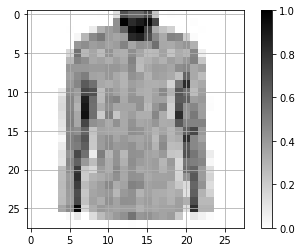

In [17]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(True)
plt.show()

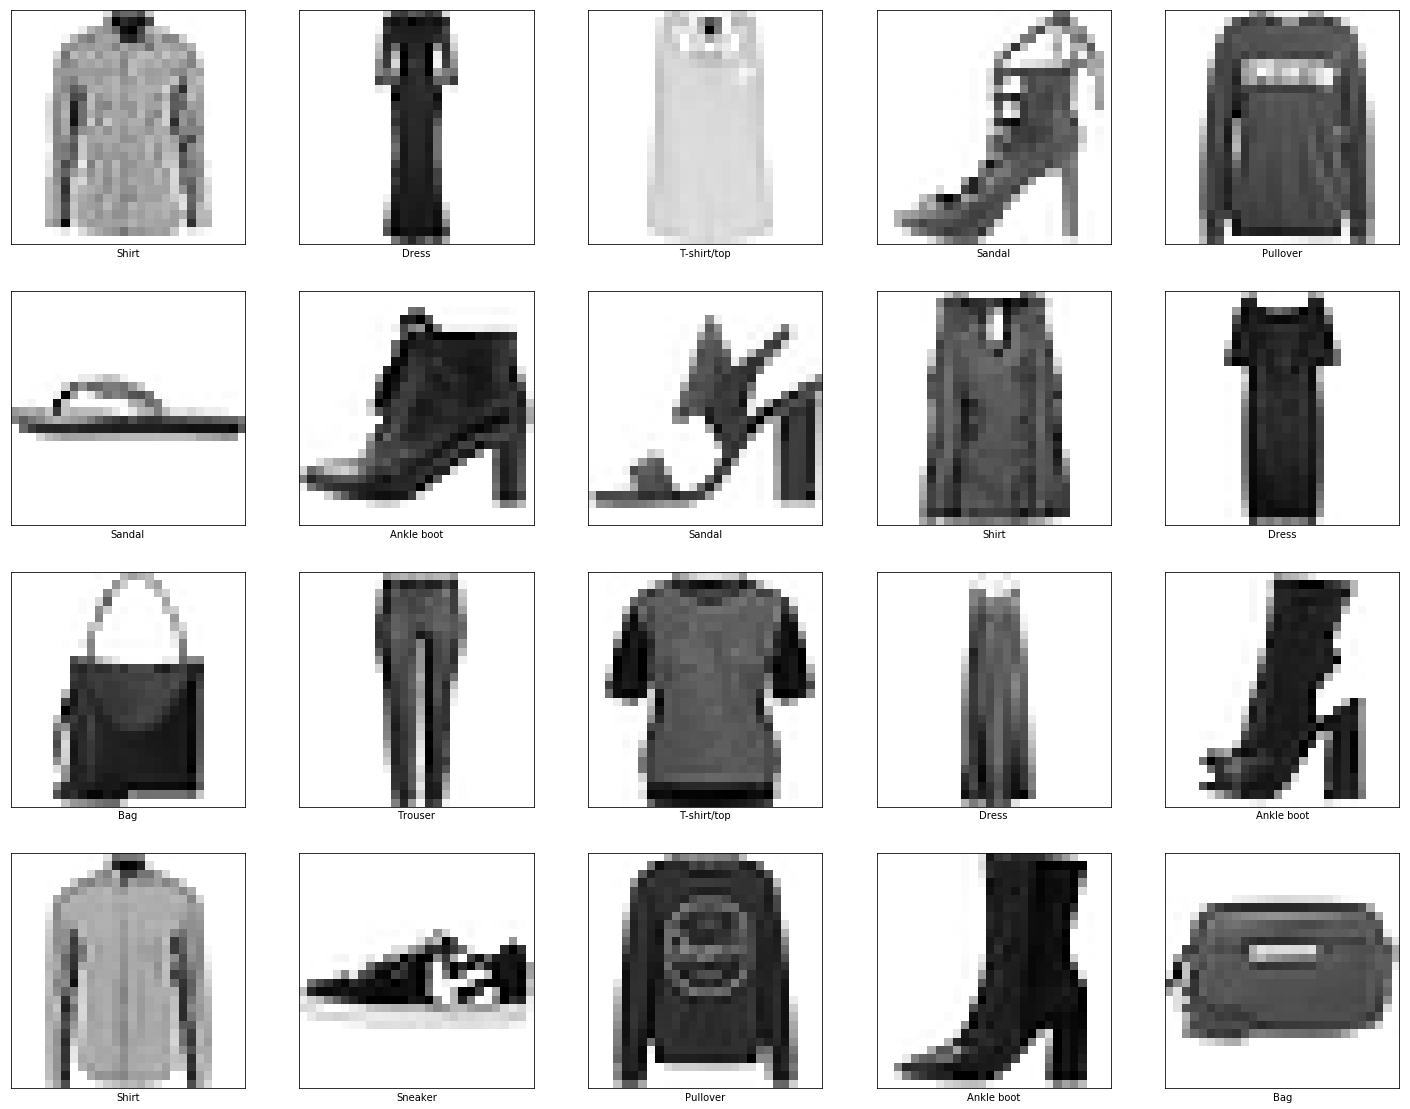

In [19]:
plt.figure(figsize=(25,25))
i = 0
for (image, label) in test_dataset.take(20):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [20]:
#creating the neural network with 28*28 size array as input 1 hiddent layer of 128 nodes and 10 output nodes
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [21]:
#compiling model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:

#    Repeat forever by specifying dataset.repeat() (the epochs parameter described below limits how long we perform training).
 #   The dataset.shuffle(60000=num_train_example) randomizes the order so our model cannot learn anything from the order of the examples.
  #  And dataset.batch(32) tells model.fit to use batches of 32 images and labels when updating the model variables.

BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [23]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5


1135/1875 [=================>............] - ETA: 10:19:37 - loss: 2.4037 - acc: 0.093 - ETA: 3:26:58 - loss: 2.2776 - acc: 0.177 - ETA: 1:28:45 - loss: 2.0359 - acc: 0.29 - ETA: 51:47 - loss: 1.8557 - acc: 0.3490 - ETA: 38:51 - loss: 1.7155 - acc: 0.40 - ETA: 31:07 - loss: 1.5976 - acc: 0.45 - ETA: 23:56 - loss: 1.4734 - acc: 0.48 - ETA: 21:29 - loss: 1.4031 - acc: 0.51 - ETA: 17:48 - loss: 1.3382 - acc: 0.54 - ETA: 15:34 - loss: 1.2733 - acc: 0.55 - ETA: 14:30 - loss: 1.2428 - acc: 0.56 - ETA: 12:59 - loss: 1.2094 - acc: 0.57 - ETA: 12:00 - loss: 1.1739 - acc: 0.58 - ETA: 10:57 - loss: 1.1520 - acc: 0.59 - ETA: 9:54 - loss: 1.1115 - acc: 0.6131 - ETA: 9:11 - loss: 1.0871 - acc: 0.623 - ETA: 8:41 - loss: 1.0664 - acc: 0.631 - ETA: 7:54 - loss: 1.0389 - acc: 0.644 - ETA: 7:49 - loss: 1.0336 - acc: 0.647 - ETA: 7:05 - loss: 1.0068 - acc: 0.657 - ETA: 6:29 - loss: 0.9802 - acc: 0.666 - ETA: 6:26 - loss: 0.9766 - acc: 0.668 - ETA: 6:07 - loss: 0.9638 - acc: 0.672 - ETA: 5:57 - loss: 0.957

1875/1875 [==============================] - ETA: 21s - loss: 0.5393 - acc: 0.81 - ETA: 20s - loss: 0.5391 - acc: 0.81 - ETA: 20s - loss: 0.5378 - acc: 0.81 - ETA: 20s - loss: 0.5374 - acc: 0.81 - ETA: 20s - loss: 0.5370 - acc: 0.81 - ETA: 19s - loss: 0.5357 - acc: 0.81 - ETA: 19s - loss: 0.5350 - acc: 0.81 - ETA: 19s - loss: 0.5347 - acc: 0.81 - ETA: 19s - loss: 0.5343 - acc: 0.81 - ETA: 19s - loss: 0.5339 - acc: 0.81 - ETA: 19s - loss: 0.5334 - acc: 0.81 - ETA: 18s - loss: 0.5328 - acc: 0.81 - ETA: 18s - loss: 0.5331 - acc: 0.81 - ETA: 18s - loss: 0.5330 - acc: 0.81 - ETA: 18s - loss: 0.5327 - acc: 0.81 - ETA: 18s - loss: 0.5325 - acc: 0.81 - ETA: 18s - loss: 0.5323 - acc: 0.81 - ETA: 18s - loss: 0.5324 - acc: 0.81 - ETA: 17s - loss: 0.5319 - acc: 0.81 - ETA: 17s - loss: 0.5319 - acc: 0.81 - ETA: 17s - loss: 0.5321 - acc: 0.81 - ETA: 17s - loss: 0.5319 - acc: 0.81 - ETA: 17s - loss: 0.5317 - acc: 0.81 - ETA: 16s - loss: 0.5313 - acc: 0.81 - ETA: 16s - loss: 0.5312 - acc: 0.81 - ETA: 

1074/1875 [================>.............] - ETA: 2:35 - loss: 0.2577 - acc: 0.906 - ETA: 51s - loss: 0.4249 - acc: 0.856 - ETA: 50s - loss: 0.3925 - acc: 0.87 - ETA: 41s - loss: 0.3744 - acc: 0.87 - ETA: 39s - loss: 0.3601 - acc: 0.87 - ETA: 36s - loss: 0.3950 - acc: 0.87 - ETA: 37s - loss: 0.4017 - acc: 0.86 - ETA: 35s - loss: 0.4118 - acc: 0.86 - ETA: 38s - loss: 0.4125 - acc: 0.86 - ETA: 34s - loss: 0.4043 - acc: 0.86 - ETA: 34s - loss: 0.4115 - acc: 0.86 - ETA: 33s - loss: 0.4030 - acc: 0.86 - ETA: 33s - loss: 0.3992 - acc: 0.86 - ETA: 30s - loss: 0.4125 - acc: 0.86 - ETA: 31s - loss: 0.4158 - acc: 0.85 - ETA: 31s - loss: 0.4219 - acc: 0.85 - ETA: 30s - loss: 0.4302 - acc: 0.85 - ETA: 31s - loss: 0.4295 - acc: 0.85 - ETA: 30s - loss: 0.4242 - acc: 0.85 - ETA: 29s - loss: 0.4236 - acc: 0.85 - ETA: 28s - loss: 0.4147 - acc: 0.85 - ETA: 29s - loss: 0.4145 - acc: 0.85 - ETA: 27s - loss: 0.4188 - acc: 0.85 - ETA: 28s - loss: 0.4170 - acc: 0.85 - ETA: 27s - loss: 0.4161 - acc: 0.85 - ET

1875/1875 [==============================] - ETA: 10s - loss: 0.3894 - acc: 0.86 - ETA: 10s - loss: 0.3896 - acc: 0.86 - ETA: 9s - loss: 0.3894 - acc: 0.8604 - ETA: 9s - loss: 0.3892 - acc: 0.860 - ETA: 9s - loss: 0.3889 - acc: 0.860 - ETA: 9s - loss: 0.3887 - acc: 0.860 - ETA: 9s - loss: 0.3882 - acc: 0.860 - ETA: 9s - loss: 0.3875 - acc: 0.861 - ETA: 9s - loss: 0.3871 - acc: 0.861 - ETA: 9s - loss: 0.3866 - acc: 0.861 - ETA: 9s - loss: 0.3869 - acc: 0.861 - ETA: 9s - loss: 0.3863 - acc: 0.861 - ETA: 9s - loss: 0.3866 - acc: 0.861 - ETA: 9s - loss: 0.3865 - acc: 0.861 - ETA: 9s - loss: 0.3862 - acc: 0.861 - ETA: 8s - loss: 0.3865 - acc: 0.861 - ETA: 8s - loss: 0.3862 - acc: 0.861 - ETA: 8s - loss: 0.3862 - acc: 0.861 - ETA: 8s - loss: 0.3861 - acc: 0.861 - ETA: 8s - loss: 0.3859 - acc: 0.861 - ETA: 8s - loss: 0.3865 - acc: 0.861 - ETA: 8s - loss: 0.3868 - acc: 0.861 - ETA: 8s - loss: 0.3870 - acc: 0.861 - ETA: 8s - loss: 0.3870 - acc: 0.861 - ETA: 8s - loss: 0.3871 - acc: 0.861 - ETA:

1034/1875 [===============>..............] - ETA: 2:50 - loss: 0.2107 - acc: 0.906 - ETA: 1:28 - loss: 0.2804 - acc: 0.895 - ETA: 54s - loss: 0.3076 - acc: 0.875 - ETA: 43s - loss: 0.3271 - acc: 0.87 - ETA: 33s - loss: 0.3404 - acc: 0.86 - ETA: 35s - loss: 0.3420 - acc: 0.86 - ETA: 31s - loss: 0.3441 - acc: 0.86 - ETA: 32s - loss: 0.3546 - acc: 0.86 - ETA: 29s - loss: 0.3361 - acc: 0.87 - ETA: 29s - loss: 0.3408 - acc: 0.87 - ETA: 28s - loss: 0.3339 - acc: 0.87 - ETA: 28s - loss: 0.3282 - acc: 0.87 - ETA: 27s - loss: 0.3298 - acc: 0.87 - ETA: 26s - loss: 0.3347 - acc: 0.87 - ETA: 25s - loss: 0.3370 - acc: 0.87 - ETA: 25s - loss: 0.3349 - acc: 0.87 - ETA: 25s - loss: 0.3350 - acc: 0.87 - ETA: 26s - loss: 0.3352 - acc: 0.87 - ETA: 25s - loss: 0.3366 - acc: 0.87 - ETA: 26s - loss: 0.3365 - acc: 0.87 - ETA: 27s - loss: 0.3366 - acc: 0.87 - ETA: 27s - loss: 0.3343 - acc: 0.87 - ETA: 26s - loss: 0.3367 - acc: 0.87 - ETA: 27s - loss: 0.3342 - acc: 0.87 - ETA: 27s - loss: 0.3356 - acc: 0.87 - 

1875/1875 [==============================] - ETA: 10s - loss: 0.3374 - acc: 0.87 - ETA: 10s - loss: 0.3376 - acc: 0.87 - ETA: 10s - loss: 0.3378 - acc: 0.87 - ETA: 10s - loss: 0.3376 - acc: 0.87 - ETA: 10s - loss: 0.3373 - acc: 0.87 - ETA: 10s - loss: 0.3374 - acc: 0.87 - ETA: 10s - loss: 0.3370 - acc: 0.87 - ETA: 10s - loss: 0.3368 - acc: 0.87 - ETA: 10s - loss: 0.3367 - acc: 0.87 - ETA: 10s - loss: 0.3365 - acc: 0.87 - ETA: 9s - loss: 0.3362 - acc: 0.8767 - ETA: 9s - loss: 0.3360 - acc: 0.876 - ETA: 9s - loss: 0.3359 - acc: 0.877 - ETA: 9s - loss: 0.3353 - acc: 0.877 - ETA: 9s - loss: 0.3354 - acc: 0.877 - ETA: 9s - loss: 0.3358 - acc: 0.877 - ETA: 9s - loss: 0.3361 - acc: 0.877 - ETA: 9s - loss: 0.3365 - acc: 0.877 - ETA: 9s - loss: 0.3363 - acc: 0.877 - ETA: 9s - loss: 0.3361 - acc: 0.877 - ETA: 9s - loss: 0.3356 - acc: 0.877 - ETA: 9s - loss: 0.3353 - acc: 0.877 - ETA: 9s - loss: 0.3353 - acc: 0.877 - ETA: 8s - loss: 0.3354 - acc: 0.877 - ETA: 8s - loss: 0.3354 - acc: 0.877 - ETA:

1158/1875 [=================>............] - ETA: 2:53 - loss: 0.2409 - acc: 0.875 - ETA: 47s - loss: 0.3817 - acc: 0.861 - ETA: 37s - loss: 0.3936 - acc: 0.85 - ETA: 33s - loss: 0.4101 - acc: 0.84 - ETA: 33s - loss: 0.3952 - acc: 0.85 - ETA: 34s - loss: 0.3903 - acc: 0.84 - ETA: 33s - loss: 0.3828 - acc: 0.85 - ETA: 30s - loss: 0.3728 - acc: 0.85 - ETA: 32s - loss: 0.3768 - acc: 0.85 - ETA: 29s - loss: 0.3728 - acc: 0.85 - ETA: 28s - loss: 0.3718 - acc: 0.85 - ETA: 28s - loss: 0.3615 - acc: 0.85 - ETA: 27s - loss: 0.3537 - acc: 0.86 - ETA: 26s - loss: 0.3504 - acc: 0.86 - ETA: 26s - loss: 0.3547 - acc: 0.86 - ETA: 25s - loss: 0.3468 - acc: 0.86 - ETA: 25s - loss: 0.3503 - acc: 0.86 - ETA: 25s - loss: 0.3479 - acc: 0.86 - ETA: 24s - loss: 0.3460 - acc: 0.86 - ETA: 25s - loss: 0.3479 - acc: 0.86 - ETA: 25s - loss: 0.3495 - acc: 0.86 - ETA: 25s - loss: 0.3508 - acc: 0.86 - ETA: 24s - loss: 0.3560 - acc: 0.86 - ETA: 25s - loss: 0.3555 - acc: 0.86 - ETA: 24s - loss: 0.3532 - acc: 0.86 - ET

1875/1875 [==============================] - ETA: 8s - loss: 0.3131 - acc: 0.882 - ETA: 8s - loss: 0.3134 - acc: 0.882 - ETA: 8s - loss: 0.3136 - acc: 0.882 - ETA: 8s - loss: 0.3138 - acc: 0.882 - ETA: 8s - loss: 0.3137 - acc: 0.882 - ETA: 7s - loss: 0.3140 - acc: 0.882 - ETA: 8s - loss: 0.3140 - acc: 0.882 - ETA: 7s - loss: 0.3144 - acc: 0.882 - ETA: 7s - loss: 0.3142 - acc: 0.882 - ETA: 7s - loss: 0.3140 - acc: 0.882 - ETA: 7s - loss: 0.3137 - acc: 0.882 - ETA: 7s - loss: 0.3136 - acc: 0.882 - ETA: 7s - loss: 0.3136 - acc: 0.882 - ETA: 7s - loss: 0.3132 - acc: 0.882 - ETA: 7s - loss: 0.3128 - acc: 0.883 - ETA: 7s - loss: 0.3125 - acc: 0.883 - ETA: 7s - loss: 0.3125 - acc: 0.883 - ETA: 7s - loss: 0.3125 - acc: 0.883 - ETA: 7s - loss: 0.3123 - acc: 0.883 - ETA: 7s - loss: 0.3121 - acc: 0.883 - ETA: 7s - loss: 0.3122 - acc: 0.883 - ETA: 7s - loss: 0.3120 - acc: 0.883 - ETA: 7s - loss: 0.3120 - acc: 0.883 - ETA: 7s - loss: 0.3120 - acc: 0.883 - ETA: 7s - loss: 0.3120 - acc: 0.883 - ETA: 

1116/1875 [================>.............] - ETA: 2:46 - loss: 0.2491 - acc: 0.937 - ETA: 40s - loss: 0.4289 - acc: 0.861 - ETA: 41s - loss: 0.3933 - acc: 0.86 - ETA: 36s - loss: 0.3652 - acc: 0.86 - ETA: 29s - loss: 0.3516 - acc: 0.86 - ETA: 30s - loss: 0.3465 - acc: 0.86 - ETA: 30s - loss: 0.3397 - acc: 0.87 - ETA: 32s - loss: 0.3412 - acc: 0.87 - ETA: 29s - loss: 0.3198 - acc: 0.88 - ETA: 27s - loss: 0.3346 - acc: 0.88 - ETA: 30s - loss: 0.3320 - acc: 0.88 - ETA: 27s - loss: 0.3264 - acc: 0.88 - ETA: 28s - loss: 0.3295 - acc: 0.88 - ETA: 26s - loss: 0.3271 - acc: 0.87 - ETA: 25s - loss: 0.3249 - acc: 0.87 - ETA: 26s - loss: 0.3242 - acc: 0.87 - ETA: 25s - loss: 0.3170 - acc: 0.88 - ETA: 24s - loss: 0.3106 - acc: 0.88 - ETA: 24s - loss: 0.3159 - acc: 0.88 - ETA: 24s - loss: 0.3112 - acc: 0.88 - ETA: 24s - loss: 0.3129 - acc: 0.88 - ETA: 23s - loss: 0.3137 - acc: 0.88 - ETA: 23s - loss: 0.3157 - acc: 0.88 - ETA: 23s - loss: 0.3115 - acc: 0.88 - ETA: 22s - loss: 0.3117 - acc: 0.88 - ET

1875/1875 [==============================] - ETA: 9s - loss: 0.2989 - acc: 0.890 - ETA: 9s - loss: 0.2988 - acc: 0.890 - ETA: 8s - loss: 0.2986 - acc: 0.890 - ETA: 8s - loss: 0.2986 - acc: 0.890 - ETA: 8s - loss: 0.2983 - acc: 0.890 - ETA: 8s - loss: 0.2988 - acc: 0.890 - ETA: 8s - loss: 0.2989 - acc: 0.890 - ETA: 8s - loss: 0.2990 - acc: 0.890 - ETA: 8s - loss: 0.2990 - acc: 0.890 - ETA: 8s - loss: 0.2986 - acc: 0.890 - ETA: 8s - loss: 0.2988 - acc: 0.890 - ETA: 8s - loss: 0.2990 - acc: 0.890 - ETA: 8s - loss: 0.2991 - acc: 0.890 - ETA: 8s - loss: 0.2991 - acc: 0.890 - ETA: 8s - loss: 0.2992 - acc: 0.890 - ETA: 8s - loss: 0.2987 - acc: 0.890 - ETA: 7s - loss: 0.2988 - acc: 0.890 - ETA: 7s - loss: 0.2982 - acc: 0.890 - ETA: 7s - loss: 0.2982 - acc: 0.890 - ETA: 7s - loss: 0.2981 - acc: 0.890 - ETA: 7s - loss: 0.2983 - acc: 0.890 - ETA: 7s - loss: 0.2983 - acc: 0.890 - ETA: 7s - loss: 0.2985 - acc: 0.890 - ETA: 7s - loss: 0.2987 - acc: 0.890 - ETA: 7s - loss: 0.2990 - acc: 0.889 - ETA: 

In [31]:
#checking the accuracy
print('Hello')
test_loss,test_accuracy=model.evaluate(test_dataset,steps=math.ceil(num_test_examples/32))
print('Accuracy of the test set:',test_accuracy)

Hello
313/313 [==============================] - ETA: 4s - loss: 0.4750 - acc: 0.875 - ETA: 4s - loss: 0.2560 - acc: 0.921 - ETA: 4s - loss: 0.2936 - acc: 0.893 - ETA: 4s - loss: 0.2859 - acc: 0.894 - ETA: 4s - loss: 0.2687 - acc: 0.898 - ETA: 3s - loss: 0.2677 - acc: 0.898 - ETA: 3s - loss: 0.3058 - acc: 0.885 - ETA: 3s - loss: 0.3200 - acc: 0.877 - ETA: 3s - loss: 0.3260 - acc: 0.875 - ETA: 3s - loss: 0.3193 - acc: 0.880 - ETA: 3s - loss: 0.3141 - acc: 0.884 - ETA: 3s - loss: 0.3251 - acc: 0.882 - ETA: 3s - loss: 0.3423 - acc: 0.879 - ETA: 3s - loss: 0.3386 - acc: 0.880 - ETA: 3s - loss: 0.3319 - acc: 0.882 - ETA: 3s - loss: 0.3316 - acc: 0.883 - ETA: 3s - loss: 0.3310 - acc: 0.883 - ETA: 3s - loss: 0.3305 - acc: 0.883 - ETA: 3s - loss: 0.3303 - acc: 0.882 - ETA: 3s - loss: 0.3279 - acc: 0.881 - ETA: 3s - loss: 0.3249 - acc: 0.881 - ETA: 2s - loss: 0.3201 - acc: 0.883 - ETA: 2s - loss: 0.3287 - acc: 0.880 - ETA: 2s - loss: 0.3254 - acc: 0.881 - ETA: 2s - loss: 0.3301 - acc: 0.879 - E

In [41]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)
    #ptint(predictions.shape)
print(predictions[0])

[4.2704880e-05 2.8753169e-07 1.5869983e-02 4.9901450e-05 6.0848016e-02
 3.0633917e-08 9.2318761e-01 6.8985333e-09 1.4601160e-06 1.3413070e-08]


In [42]:
print(np.argmax(predictions[0]))

6


In [43]:
#Some High level plotting 
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img[...,0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

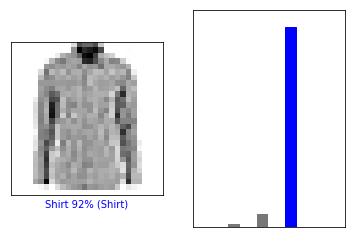

In [44]:
i = 0
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

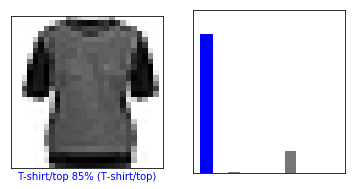

In [46]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

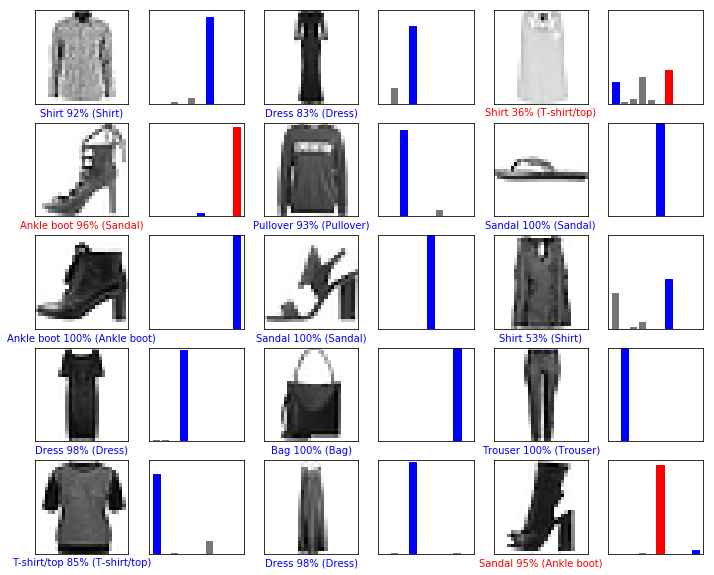

In [48]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)


In [49]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [51]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [52]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.2704760e-05 2.8753067e-07 1.5869953e-02 4.9901410e-05 6.0847934e-02
  3.0633863e-08 9.2318773e-01 6.8985342e-09 1.4601148e-06 1.3413047e-08]]


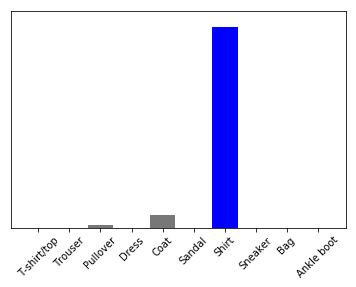

In [53]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [54]:
np.argmax(predictions_single[0])

6